Busara Mental Health Prediction Challenge

The World Health Organization estimates that 1.3 million Kenyans suffer from untreated major depressive disorder (MDD; commonly known as depression) every year, and that sub-Saharan Africa has the highest prevalence of the illness of any region in the world. Yet mental health treatment in Kenya suffers from a lack of resources and stigmatization. There are only two certified psychiatrists per million people in Kenya. Few facilities exist outside of urban areas and people are unlikely to know about or access them.

Can machine learning help alleviate this problem? Smart targeting of potential cases could help enable scarce resources to reach those who most need it and improve or save an untold number of lives.

This model which accurately predicts which individuals are likely to be depressed from the survey data could be used by mental health providers such as local clinics, NGOs or community health volunteers to reach out to those at risk

The Data used was provided by Busara Centre for Behavioural Sciences for their Data Hackathon in 2018.


In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
%matplotlib inline

In [2]:
#from fast.ai
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [3]:
#Import train data
df = pd.read_csv(r'/Users/stellahrotich/Downloads/Mwanga-master/DepressionData/train.csv')
#Import test data
df_test = pd.read_csv(r'/Users/stellahrotich/Downloads/Mwanga-master/DepressionData/test.csv')

In [4]:
display_all(df.head())

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


Feature Engineering

In [5]:
# sns.barplot(x="age", y="depressed", hue="femaleres", data=df);

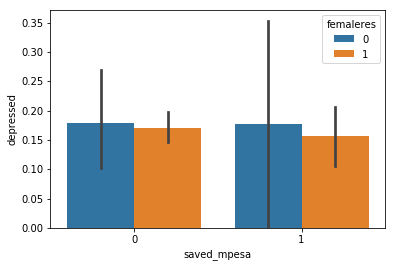

In [6]:
sns.barplot(x="saved_mpesa", y="depressed", hue="femaleres", data=df);

Preprocessing Data for performing Machine learning algorithms

In [7]:
df.drop(['survey_date'], axis=1, inplace=True) 

In [8]:
df = df.fillna(df.mean())

In [9]:
df['depressed'].value_counts()

0    950
1    193
Name: depressed, dtype: int64

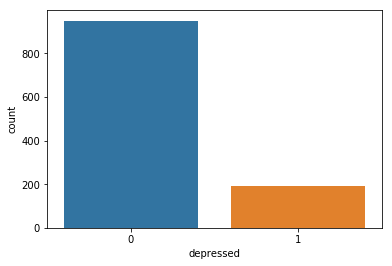

In [10]:
sns.countplot(df['depressed'])

In [11]:
display_all(df.head())

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,1,28.0,1,4,6,10,0,4.906057,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,1.829645,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.899587,0.440853,3.070457,0.274413,0.36712,5.626042,8.051863,3.722442,0.519817,0.49644,0.797353,1.955721,0.695412,1,1,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,1,23.0,1,3,5,8,0,4.906057,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,1.829645,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.899587,0.440853,3.070457,0.274413,0.36712,5.626042,8.051863,3.722442,0.519817,0.49644,0.797353,1.955721,0.695412,1,1,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,1,22.0,1,3,5,9,0,4.906057,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,1.829645,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.899587,0.440853,3.070457,0.274413,0.36712,5.626042,8.051863,3.722442,0.519817,0.49644,0.797353,1.955721,0.695412,1,1,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,1,27.0,1,2,4,10,2,4.000000,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.000000,0.000000,3.000000,1.000000,1.00000,5.626042,8.051863,3.722442,0.000000,0.00000,0.797353,0.000000,0.695412,1,1,0.510452,20.179367,10.089684,0.500000,1.500000,0.000000,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,0,59.0,0,4,6,10,4,6.000000,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.000000,0.000000,2.000000,0.000000,0.00000,5.626042,8.051863,1.233183,0.333333,0.25000,0.500000,1.166667,1.000000,1,1,0.510452,27.226130,6.806532,0.750000,1.750000,1.250000,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


Splitting up the Training Data

In [12]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop(['depressed', 'surveyid'], axis = 1)
y = df['depressed']

In [13]:
#Split the dataset into train and Test
seed = 23
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [14]:
# #Applying Standard scaling to get optimized result
sc = StandardScaler()

In [15]:
X_test = sc.fit_transform(X_test)

In [16]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

('Training Features Shape:', (914, 72))
('Training Labels Shape:', (914,))
('Testing Features Shape:', (229, 72))
('Testing Labels Shape:', (229,))


Training and testing data is ready now for fitting and tuning an algorithm
Now it's time to figure out which algorithm is going to deliver the best model. I'm going with the RandomForestClassifier, but you can drop any other classifier here, such as Support Vector Machines or Naive Bayes.

Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [19]:
#build model
rfc = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [20]:
# Train the classifier
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
# Apply The Full Featured Classifier To The Test Data
rfc_pred = rfc.predict(X_test)

In [22]:
#Let's see how our model performed
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       0.85      0.99      0.92       194
          1       0.50      0.03      0.05        35

avg / total       0.80      0.85      0.78       229



In [23]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, rfc_pred))

[[193   1]
 [ 34   1]]


In [24]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,rfc_pred))

('Accuracy for Random Forest on CV data: ', 0.8471615720524017)


increase accuracy of models(try)


Grid Search with Cross Validation - Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [26]:
# Choose the type of classifier. 
rfc1 = RandomForestClassifier()

In [27]:
# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

In [28]:
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

In [29]:
# Run the grid search
grid_obj = GridSearchCV(rfc1, parameters, scoring=acc_scorer, cv=10, n_jobs = -1, verbose = 2)

In [30]:
grid_obj = grid_obj.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2, 

[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.2s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimato

[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2 


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.0s


[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2 
[CV] min_samples_leaf=1, n_estimator

[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2 
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimato

[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.2s
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2 
[CV] min_samples_leaf=5, n_estimator

[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.3s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.3s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.3s
[CV] min_samples_leaf=5, n_estimator

[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.3s
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2 
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimator

[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimator

[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimator

[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   11.7s


[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimato

[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2 
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_featu

[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.2s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV] min_samples_leaf=5, n_estimator

[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimato

[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimator

[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=2 
[CV] min_samples_leaf=8, n_estimator

[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimator

[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimator

[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   28.4s


[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf

[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimato

[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimato

[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf

[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimato

[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf

[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3 
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3 
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimator

[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.2s
[CV]  min_samples_leaf=5, n_estimato

[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3 
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.2s
[CV]  min_samples_leaf=8, n_estimato

[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimator

[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimator

[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimator

[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3 
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimator

[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimator

[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   50.1s


[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimato

[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3 
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3 
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=8, n_estimato

[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimato

[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimato

[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf

[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3 
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimato

[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimato

[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimato

[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=3 
[CV] min_samples_leaf

[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=3 
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3 
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_featu

[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5 
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimator

[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5 
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.2s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5 
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimator

[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimator

[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5 
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimator

[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5 
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimator

[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=8, n_estimato

[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.0s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.2s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5 
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimator

[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimato

[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:  1.3min


[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimator

[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=5, n_estimato

[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimator

[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5 
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimator

[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_featur

[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimato

[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.2s
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5 
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimato

[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimato

[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimato

[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5 
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.2s
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5 
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimator

[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimator

[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5 
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimator

[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5 
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimator

[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10 
[CV] min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=1, n_

[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=1, n_

[CV] min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10 
[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_e

[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_

[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10 
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_e

[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_

[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10 
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_e

[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=8, n_

[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_e

[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.3s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10 
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_e

[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.3s
[CV]  min_samples_leaf=5, n_

[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_e

[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10 
[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_e

[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_e

[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.9min


[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_

[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10 
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_

[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10 
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_

[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10 
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samp

[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samp

[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_

[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.3s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_

[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_

[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=8, n_

[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10 
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, m

[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.4s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=entropy, min_samples_split=5, max_depth=10, total=   0.4s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_fe

[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2,

[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2,

[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2,

[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2 
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2,

[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2 
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2,

[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2 
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2,

[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2, total=   0.0s
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2 
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2,

[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt,

[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, 

[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt,

[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2 
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2 
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt,

[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2 
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt,

[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2 
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt,

[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt,

[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt,

[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto,

[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini

[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.2s
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto,

[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto,

[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto,

[Parallel(n_jobs=-1)]: Done 3946 tasks      | elapsed:  2.6min


[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.2s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_

[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=2, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto,

[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=2, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=2, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, 

[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3 
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_

[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, 

[CV] min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=log2, 

[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, 

[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, 

[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3 
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=4, max

[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, 

[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=3 
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, 

[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, 

[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, 

[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, 

[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3 
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3 
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, 

[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, 

[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3 
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt,

[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3 
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, 

[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt,

[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, 

[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3 
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=auto, 

[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3 
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, 

[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3 
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, 

[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3 
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, 

[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=3, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, 

[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3 
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=3, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, 

[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=3, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, 

[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5 
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2,

[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5 
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5 
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=log2, 

[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, 

[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5 
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, 

[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5 
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, 

[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, 

[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, 

[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5 
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, 

[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed:  3.3min


[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5 
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, 

[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=sqrt, 

[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, 

[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=sqrt, 

[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, 

[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, 

[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5 
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5 
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=5 
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini,

[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5 
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, 

[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, 

[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5, total=   0.3s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5, total=   0.3s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5, total=   0.3s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, 

[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5, total=   0.3s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, 

[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5, total=   0.2s
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto,

[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, 

[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=5 
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, 

[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=5, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, 

[CV] min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_feature

[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10 
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=1, n_estimators=4, max_featur

[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10, total=   0.3s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10 
[CV] min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_feature

[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_feature

[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_feature

[CV] min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10, total=   0.3s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10, total=   0.3s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=2, max_depth=10 
[CV] min_samples_leaf=8, n_estimators=9, max_feature

[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=3, max_depth=10 
[CV] min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=4, max_featur

[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=log2, criterion=gini, min_samples_split=5, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=4, max_feature

[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10 
[CV] min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10, total=   0.3s
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_featur

[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10 
[CV] min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_feature

[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10 
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=9, max_feature

[CV] min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10, total=   0.3s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_feature

[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_feature

[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10, total=   0.0s
[CV] min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10 
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_feature

[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=9, max_features=sqrt, criterion=gini, min_samples_split=3, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=4, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=sqrt, criterion=gini, min_samples_split=5, max_depth=10 
[CV] min_samples_leaf=8, n_estimators=6, max_feature

[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10 
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10 
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criteri

[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10 
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10 
[CV] min_samples_leaf=1, n_estimators=9, max_feature

[CV] min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=1, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10 
[CV] min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10, total=   0.2s
[CV] min_samples_leaf=1, n_estimators=9, max_feature

[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10 
[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_feature

[CV] min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10, total=   0.2s
[CV] min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=5, n_estimators=4, max_feature

[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=5, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10, total=   0.3s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=2, max_depth=10 
[CV] min_samples_leaf=8, n_estimators=6, max_feature

[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=4, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=3, max_depth=10, total=   0.2s
[CV]  min_samples_leaf=8, n_estimators=6, max_featur

[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10, total=   0.2s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10 
[CV]  min_samples_leaf=8, n_estimators=6, max_features=auto, criterion=gini, min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_leaf=8, n_estimators=9, max_feature

[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:  4.2min finished


In [44]:
# Set the clf to the best combination of parameters
grid_obj.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'n_estimators': 4}

In [45]:
rfc2 = RandomForestClassifier(random_state=42, max_depth = 5, max_features='log2',
                              min_samples_leaf = 5, min_samples_split = 5,
                              n_estimators= 4, criterion='entropy')

In [46]:
# Fit the best algorithm to the data. 
rfc2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [47]:
pred_rfc2 = rfc2.predict(X_test)

print(classification_report(y_test, pred_rfc2))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       194
          1       0.00      0.00      0.00        35

avg / total       0.72      0.85      0.78       229



/Applications/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred_rfc2))

('Accuracy for Random Forest on CV data: ', 0.8471615720524017)


Validate with KFold

Is this model actually any good? It helps to verify the effectiveness of the algorithm using KFold. This will split our data into 10 buckets, then run the algorithm using a different bucket as the test set for each iteration.

In [49]:
from sklearn.cross_validation import KFold

def run_kfold(rfc2):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        rfc2.fit(X_train, y_train)
        predictions = rfc2.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(rfc2)

Fold 1 accuracy: 0.733333333333
Fold 2 accuracy: 0.808988764045
Fold 3 accuracy: 0.887640449438
Fold 4 accuracy: 0.842696629213
Fold 5 accuracy: 0.797752808989
Fold 6 accuracy: 0.842696629213
Fold 7 accuracy: 0.842696629213
Fold 8 accuracy: 0.786516853933
Fold 9 accuracy: 0.865168539326
Fold 10 accuracy: 0.786516853933
Mean Accuracy: 0.819400749064


Predict the Actual Test Data

In [71]:
#Import test data
df_test = pd.read_csv(r'/Users/stellahrotich/Downloads/Mwanga-master/DepressionData/test.csv')

In [72]:
# Repeat data manipulation in train data
df_test.drop(['survey_date','depressed'], axis=1, inplace=True)

In [74]:
df_test = df_test.fillna(df_test.mean())

In [75]:
display_all(df_test.head())

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,day_of_week
0,901,181,1,21,0,3,4,10,3,4.0,357.817690,355.244350,208.199810,40.038425,0.000000,2.00,0,230.975950,4.484304,0.00000,0.0,0.0,0.0000,0.000000,4.003842,122.837890,0,1,0,1,0,72.069168,24.023054,3.042920,6.526263,0.000000,48.166225,7.5,0.0,1.000000,0.0,3.0,0.0,1.0,12.011527,6.878325,12.278451,1.000000,1.000000,1.000000,1.000000,1.000000,1,1,0.506944,0.000000,0.000000,0.000000,0.000000,0.775476,0,0,569.850340,48.166222,0,0.0,0,0.0,0.0,1,0.000000,0,3
1,498,47,1,44,1,6,8,6,6,8.0,233.441540,240.958880,11.691220,0.000000,12.812296,3.00,0,211.948930,7.420455,1.08492,0.0,0.0,0.0000,1.521460,0.000000,19.971167,0,1,0,0,0,0.000000,0.000000,1.654922,0.378141,8.034377,0.378141,3.0,0.0,0.000000,0.0,5.0,0.0,0.0,5.555798,6.878325,1.089045,0.750000,0.666667,0.666667,2.750000,0.333333,1,1,0.506944,18.257523,3.651504,0.800000,3.000000,1.600000,0,0,252.650100,14.711897,0,0.0,0,0.0,0.0,0,0.000000,0,2
2,710,8,1,23,1,1,3,7,1,3.0,171.970760,0.000000,120.916050,56.053795,0.000000,0.00,0,81.644066,0.000000,0.00000,0.0,0.0,0.0000,0.720692,13.452910,76.153084,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.0,0.0,0.000000,0.0,2.0,0.0,1.0,13.079219,32.030739,4.804611,1.000000,1.000000,1.000000,2.666667,1.000000,1,1,0.506944,8.648300,8.648300,1.000000,1.000000,0.775476,1,0,141.736020,0.720692,0,0.0,0,0.0,0.0,1,0.080077,0,1
3,433,25,1,67,0,0,1,1,0,1.0,37.013428,20.651573,32.831509,0.000000,0.000000,1.75,0,25.749285,0.160154,0.00000,0.0,0.0,1.0228,0.000000,2.535767,8.728376,1,0,0,0,0,0.000000,0.000000,0.000000,4.804611,0.533846,4.804611,20.0,3.0,3.491525,0.5,1.0,0.0,1.0,1.121076,6.878325,3.158983,1.000000,0.478367,1.000000,3.000000,0.000000,1,1,0.506944,45.796372,15.852179,0.696575,1.263021,0.775476,1,0,58.287693,4.804611,0,0.0,0,0.0,0.0,0,0.000000,1,3
4,44,2,1,40,1,4,6,7,4,6.0,156.061390,236.828550,158.552170,19.218445,0.080077,2.00,0,148.180500,8.608261,0.00000,0.0,0.0,0.0000,2.275517,0.000000,5.605380,1,0,0,0,0,0.000000,0.000000,1.401345,0.116779,13.012488,8.124464,1.0,0.0,20.000000,0.0,7.0,0.0,1.0,5.555798,6.878325,0.800768,0.166667,0.250000,1.000000,0.500000,1.000000,1,1,0.506944,27.306206,6.826551,1.000000,1.250000,0.750000,1,0,440.223750,10.480058,0,0.0,0,0.0,0.0,0,0.000000,1,4


In [76]:
df_test.shape

(286, 73)

In [77]:
df_test = sc.fit_transform(df_test)

In [ ]:
ids = df_test['surveyid']
predictions = rfc2.predict(df_test.drop('surveyid', axis=1))
output = pd.DataFrame({ 'surveyid' : ids, 'depressed': predictions })

In [ ]:
#save to csv file
output.to_csv((r'/Users/stellahrotich/Downloads/Mwanga-master/DepressionData/submission.csv'index=False))